# Regression with Keras

So the basic idea is to create a model that can predict prices on the housing market based on a pre-existing dataset.

The dataset can be found [on Kaggle](https://www.kaggle.com/datasets/harlfoxem/housesalesprediction).

The features of each houses will include the number of bedrooms, bathrooms, the square footage and so on.

The focus of this notebook is Exploratory Data Analysis (EDA) and Feature Engineering (FE).

## Step 1: Discovering the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set_style('darkgrid')
sns.set_theme(palette='viridis')

In [2]:
df = pd.read_csv('data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
# First, let's check if we have any missing data
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


## Step 2: Exploratory Data Analysis

### Visualize the data

It is important to have a feeling of the data before creating a model. We will use our visualizing skills.

**Histogram of prices** (our y values)

<AxesSubplot:xlabel='price', ylabel='Count'>

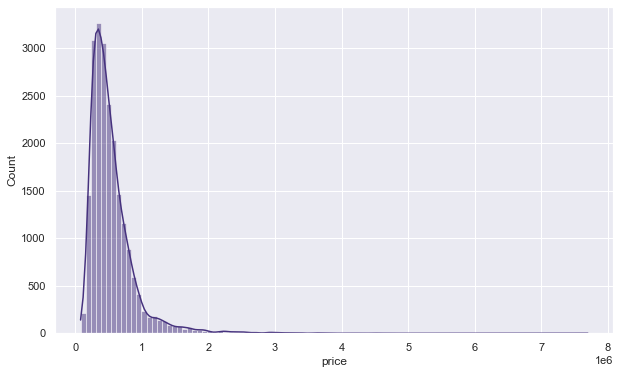

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=100, kde=True)

We notice that most of the prices fall below the 1 million mark with a peak at around 500 000. We also notice that some points go over the 7 million mark.

Now the extreme outliers for the expensive houses **could** be taken away if they only represent very extreme cases. This would allow us to create a model predicting prices for a house that has a value between 0 and 2M.

We need to identify wheter it is relevant to keep them or not.

Now let's execute the same analysis for our features.

**Countplot of bedrooms**

<AxesSubplot:xlabel='bedrooms', ylabel='count'>

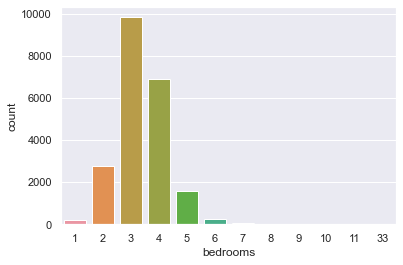

In [7]:
sns.countplot(x=df['bedrooms'])

Again we can see that most houses have between 2 and 5 bedrooms.

One outlier is probably a huge mansion with 33 bedrooms.

**Figuring out correlations**

Another trick we can use is to compare our label (the price) to a feature that we think is very influential to this label. By using the `corr()` method, we can see that the `sqft_living` feature seems to be highly correlated with the price.

In [8]:
df.corr()['price'].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

**Scatterplot of squarefoot vs price**

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

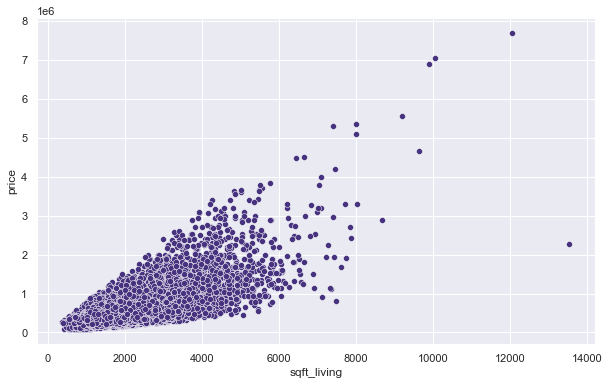

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sqft_living', y='price', data=df)

**Boxplot of bedrooms vs price**

Since we saw that the number of bedrooms had also a positive correlation, we can visualize this with boxplots.

This will show us the distribution of prices of houses per amount of bedrooms.

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

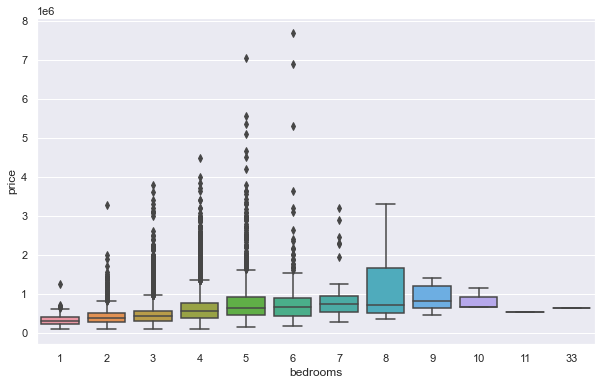

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='bedrooms', y='price', data=df)

The boxplot above shows that there is quite a bit of variation between 3 and 7 bedrooms. But this makes sense since our countplot showed that the majority of houses have between 3 and 7 bedrooms and its only normal that the price would vary within those categories.

**Note**

*There is no right or wrong way to perform EDA, so we should feel free to fiddle with the data, search for correlation or interesting features and plot them out. Mainly we will use scatterplots for highly volitile features such as square feet or prices, and countplots or boxplots for features with a limited amount of possibilities like the number of bedrooms.*

**Does location have an impact ?**

Of course it does. This is the reason why our dataset has the `lat` and `long` features representing the latitude and longitude of the house.<br/>Since *Seaborn* doesn't have any built-in geographical plotting capabilities, and also we are not really interested of plotting this on a real-world map, we will plot this with a simple scatterplot.

Let's see the distribution of price vs latitude and longitude scatterplot:

<AxesSubplot:xlabel='long', ylabel='price'>

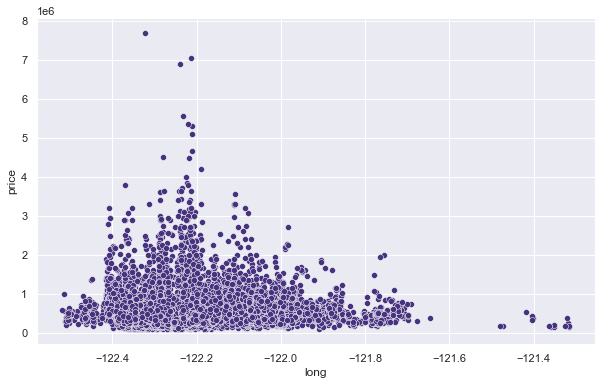

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='long', y='price', data=df)

Here we can clearly see that some areas are more expensive than others. For example the `long` 122.2 seems to be a more expensive area than let's say 121.8.

<AxesSubplot:xlabel='lat', ylabel='price'>

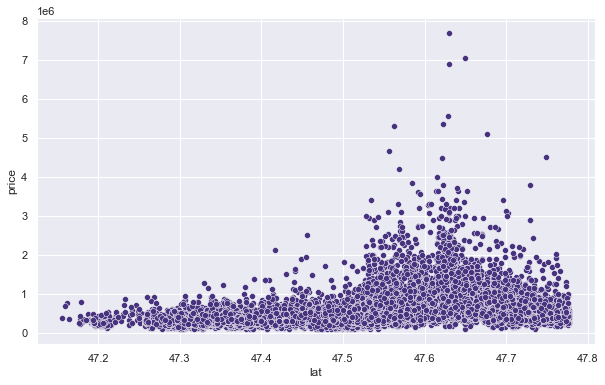

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='lat', y='price', data=df)

A similar behaviour can be identified with the `lat`. Here 47.65 seems to be the most expensive latitude.

Now check out this neat trick.

Here is a map of the King County:

<img src='https://www.kcha.org/portals/0/images/core/king_county_map.jpg' width=50%>

<AxesSubplot:xlabel='long', ylabel='lat'>

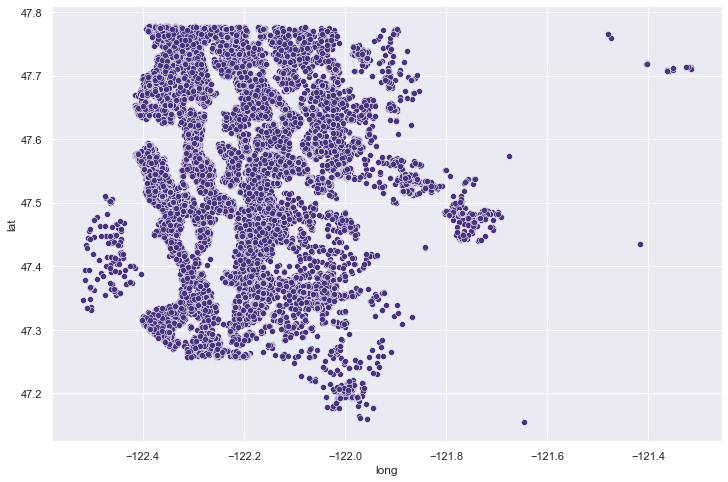

In [13]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='long', y='lat', data=df)

The scatterplot already shows a map, so now we should just adjust the `hue` based on the price.

<AxesSubplot:xlabel='long', ylabel='lat'>

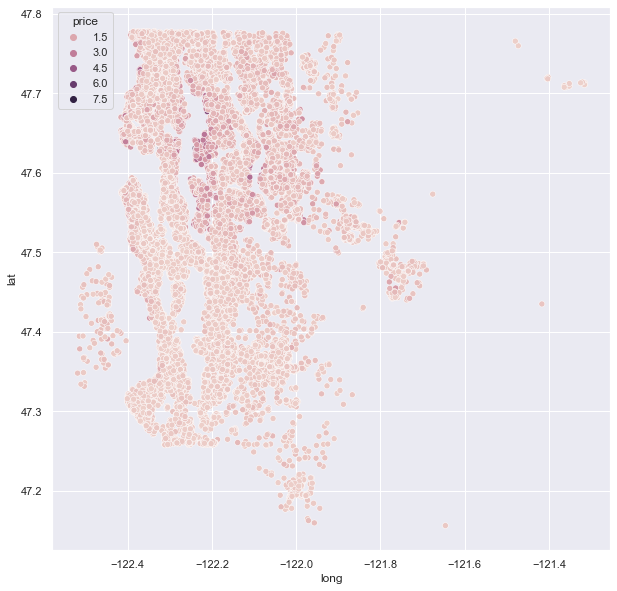

In [14]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x='long', y='lat', data=df, hue='price')

Wow, ok now let's do this again but first let's drop the outliers that have a price above 2M.

That would work, but it would also be a little arbitrary. Let's have a look at our data first

In [15]:
df.sort_values('price', ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


We can see that even though some prices are very high, they quickly go down to a reasonable amount.

We know from our `df.info` that we have 21597 entries. Which means that if we were to cut only the top 1% of the most expensive houses we would only remove 215 houses, leaving over 21000 houses left.

This is an acceptable choice that removes those annoying outliers while still keeping the vast majority of the data intact.

In [16]:
# Create a new dataframe
bottom_99_percent = df.sort_values('price', ascending=False).iloc[int(len(df) * 0.01):]

<AxesSubplot:xlabel='long', ylabel='lat'>

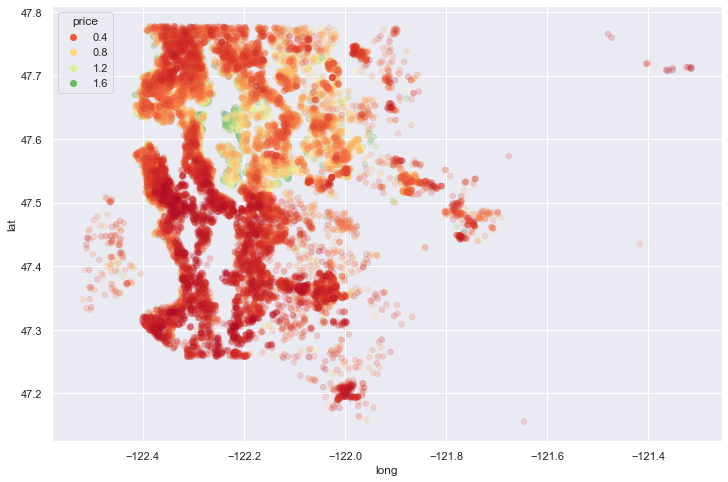

In [17]:
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='long',
    y='lat',
    data=bottom_99_percent,
    hue='price',
    edgecolor=None,  # removing the white border of the dots
    alpha=0.2,       # allowing visibility when dots are stacked
    palette='RdYlGn' # Red yellow green
)

As we can see, the expensive properties seem to be concentrated in one area. Also, the collor seem to be brighter on the waterfront.

This would make sense as the prices of waterfront properties tend to be higher. But we can verify this.

**Boxplot of price vs waterfront**

The boxplot shows us a clear correlation between the price and the fact that a property is next to the water.

<AxesSubplot:xlabel='waterfront', ylabel='price'>

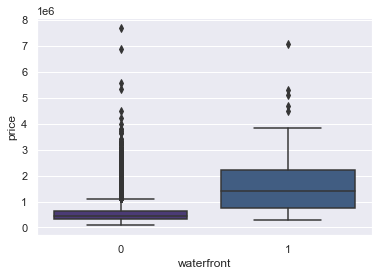

In [18]:
sns.boxplot(x='waterfront', y='price', data=df)

## Step 3: Feature Engineering

First let's have a quick refresher of our `head()`.

In [19]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


The first piece of information we can get rid of is the `id` as it is a simple unique id. The second piece of information we can fiddle with is to ensure that the `date` is a timestamp and not a date-string. We should convert it accoringly if needed.

In [20]:
df = df.drop('id', axis=1)

In [21]:
df['date'] = pd.to_datetime(df['date'])

Now the date is a datetime object.

In itself it is not really usefull. However, the year and month might be interesting features to keep in mind.

In [22]:
df['year'] = df['date'].apply(lambda x: x.year)
df['month'] = df['date'].apply(lambda x: x.month)

<AxesSubplot:xlabel='month', ylabel='price'>

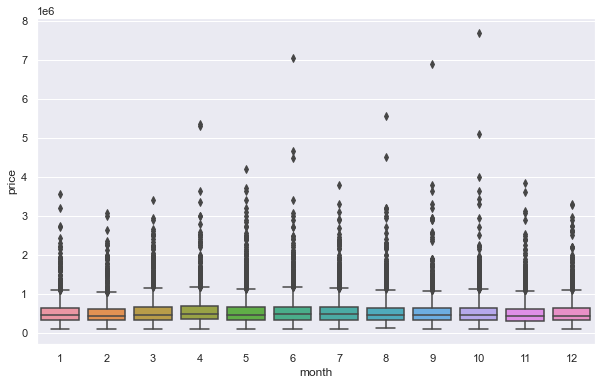

In [23]:
# Verify if the distribution per month has any interest
plt.figure(figsize=(10, 6))
sns.boxplot(x='month', y='price', data=df)

<AxesSubplot:xlabel='month'>

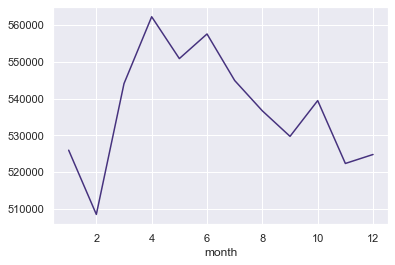

In [24]:
df.groupby('month').mean()['price'].plot()

<AxesSubplot:xlabel='year'>

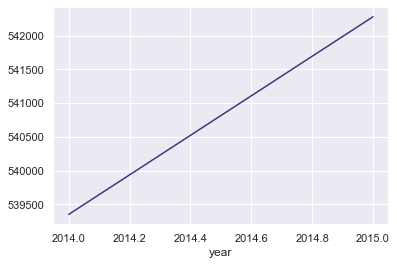

In [25]:
# And year
df.groupby('year').mean()['price'].plot()

In [26]:
# Drop the original date column
df = df.drop('date', axis=1)

#### The zipcode

Except for the date, most other features are decently organised.

However, note that the zipcode is numerical. This means that if we feed it directly into our model, the model will assume some sort of continous feature. Meaning that the zipcode 1001 is greater than 1000.

It could be the case if the zipcodes have been mapped out that way.

This is why **domain experience** is important when preparing your data. So we can search the internet for a correlation between the zipcode and the location.

In our case there doesn't seem to be such a correlation. This means that we need to start treating the zipcodes as **categories**.

Since there are 70 unique zipcodes we are going to delete them as that would add 70 columns to our dataset.

In a more realistic situation we would take the time to actually map them out (for example North, East, South, West)

In [27]:
df = df.drop('zipcode', axis=1)

#### Year of renovation

The `yr_renovated` corresponds to a year of renovation. As we can see, when a house has not been renovated, the value of the year is 0.

We could think about creating a new categorical column based on the renovation status of the house `has_been_renovated`. However, the year of the renovation is also important. Some houses that have been renovated in the 1940's don't mean much in the grand scheme of things. But the more recent a renovation, the more likely it is to impact the price.

Which is why we can consider ourselves lucky that a house that hasn't been renovated has the lowest value and a house that has been renovated has a higher value the later it has been renovated.

This means we can leave the `yr_renovated` column as is.

In [28]:
df['yr_renovated'].value_counts()

0       20683
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

The same situation applies for the `sqft_basement` feature.

## Step 3: Create the model

### Train test split

In [29]:
X = df.drop('price', axis=1).values
y = df['price'].values

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Normalize the data

In [32]:
from sklearn.preprocessing import MinMaxScaler

In [33]:
scaler = MinMaxScaler()

In [34]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Create the NN

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

Normally, we tend to create layers with a number of neurons relative to the size of the training data.

In [36]:
X_train.shape

(15117, 19)

In [37]:
model = Sequential()

model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

2022-06-15 15:37:56.880249: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-06-15 15:37:56.880581: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-15 15:37:56.880627: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (nootaku-tuxedo): /proc/driver/nvidia/version does not exist
2022-06-15 15:37:56.882232: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


When we are fitting a model, we can directly add `validation_data` to the `fit` method. This will verify the quality of the result to ensure that we are not over-fitting the model to the training data.

Another important parameter is the `batch_size`. This basically tells the model to train in batches.<br/>The use of batches can be interseting when dealing with very large datasets. By convention we use a batch size that is a multiple of 2 (64, 128, 256, etc.).<br/>The smaller the batch size, the longer it will take for the model to train but the less likely we are going to overfit the model.

In [39]:
model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_test, y_test),
    batch_size=128,
    epochs=400
)

Epoch 1/400
119/119 [==============================] - 1s 3ms/step - loss: 430245347328.0000 - val_loss: 418945171456.0000
Epoch 2/400
119/119 [==============================] - 0s 3ms/step - loss: 429596803072.0000 - val_loss: 416715833344.0000
Epoch 3/400
119/119 [==============================] - 0s 2ms/step - loss: 420702683136.0000 - val_loss: 396269027328.0000
Epoch 4/400
119/119 [==============================] - 1s 6ms/step - loss: 375138287616.0000 - val_loss: 318768906240.0000
Epoch 5/400
119/119 [==============================] - 0s 3ms/step - loss: 260552982528.0000 - val_loss: 179487178752.0000
Epoch 6/400
119/119 [==============================] - 0s 3ms/step - loss: 136309506048.0000 - val_loss: 100915126272.0000
Epoch 7/400
119/119 [==============================] - 0s 4ms/step - loss: 100111917056.0000 - val_loss: 94885003264.0000
Epoch 8/400
119/119 [==============================] - 0s 3ms/step - loss: 97324064768.0000 - val_loss: 93573169152.0000
Epoch 9/400
119/119